In [1]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt

# 6 site ring with 2 atoms on opposite site

```
  o -- o
 /      \
x        x   
 \      /
  o -- o
  
```
Potential on sites are +i for o and -i for x

In [36]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object("_6ring2sites_v2")
    first = False
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
managed to get E^2=0.00032364994881900857 with mu_imp=-0.400429577509556
managed to get E^2=8.630457415395408e-05 with mu_imp=-1.2383437993032687
Loop 0-----
managed to get E^2=0.0011065678333368283 with mu_imp=-1.1794812490404103
managed to get E^2=0.00012674346859400514 with mu_imp=-1.1912346294936047
Loop 1-----
managed to get E^2=0.0007932854272732235 with mu_imp=-0.7118700477444513
managed to get E^2=0.00033174498021402976 with mu_imp=-1.202038089502506
Loop 2-----
managed to get E^2=0.0001177749730752312 with mu_imp=-0.9640393991944873
managed to get E^2=2.6799410027520096e-08 with mu_imp=-1.202038089502506
Loop 3-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2=0.0001001178499736619 with mu_imp=-1.202038089502506
Loop 4-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2

results/2022_02_10_19_14_6ring2sites_v2_molecule.png


C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project\LPFET\lpfet.py:290: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


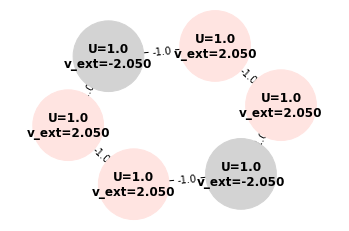

In [3]:
mol1.plot_hubbard_molecule()

In [40]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y = np.array(y)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

Text(0, 0.5, 'occupation of site 0 and 3')

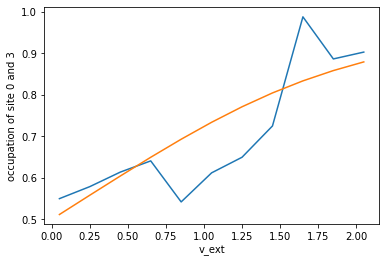

In [42]:
plt.plot(x, y_simple[:, 0])
plt.plot(x, y_ref[:, 0])
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

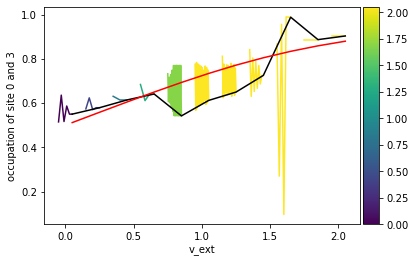

In [67]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_ref[:, 0], c='r')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)

plt.show()

## Not reseting external potential

In [73]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
for i in x:
    mol1.density_progress = []
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
managed to get E^2=0.00032364994881900857 with mu_imp=-0.400429577509556
managed to get E^2=8.630457415395408e-05 with mu_imp=-1.2383437993032687
Loop 0-----
managed to get E^2=0.0011065678333368283 with mu_imp=-1.1794812490404103
managed to get E^2=0.00012674346859400514 with mu_imp=-1.1912346294936047
Loop 1-----
managed to get E^2=0.0007932854272732235 with mu_imp=-0.7118700477444513
managed to get E^2=0.00033174498021402976 with mu_imp=-1.202038089502506
Loop 2-----
managed to get E^2=0.0001177749730752312 with mu_imp=-0.9640393991944873
managed to get E^2=2.6799410027520096e-08 with mu_imp=-1.202038089502506
Loop 3-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2=0.0001001178499736619 with mu_imp=-1.202038089502506
Loop 4-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2

In [76]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

Text(0, 0.5, 'occupation of site 0 and 3')

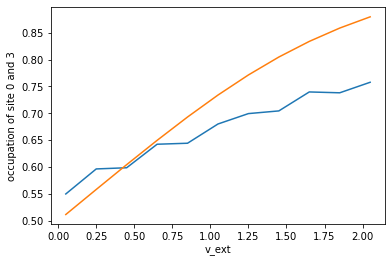

In [77]:
plt.plot(x, y_simple[:, 0])
plt.plot(x, y_ref[:, 0])
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

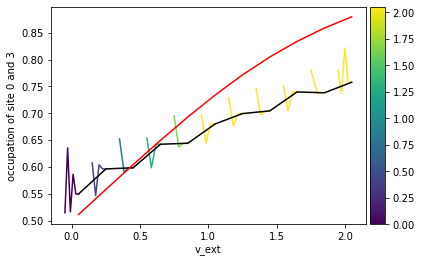

In [78]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_ref[:, 0], c='r')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)

plt.show()

In [75]:
y

array([array([[0.51481115, 0.49259442, 0.49259442, 0.51481115, 0.49259442,
               0.49259442],
              [0.63581745, 0.43209128, 0.43209128, 0.63581745, 0.43209128,
               0.43209128],
              [0.51655095, 0.49172453, 0.49172453, 0.51655095, 0.49172453,
               0.49172453],
              [0.5866672 , 0.4566664 , 0.4566664 , 0.5866672 , 0.4566664 ,
               0.4566664 ],
              [0.54993176, 0.47503412, 0.47503412, 0.54993176, 0.47503412,
               0.47503412],
              [0.54993176, 0.47503412, 0.47503412, 0.54993176, 0.47503412,
               0.47503412]])                                              ,
       array([[0.6078247 , 0.44608765, 0.44608765, 0.6078247 , 0.44608765,
               0.44608765],
              [0.54690137, 0.47654931, 0.47654931, 0.54690137, 0.47654931,
               0.47654931],
              [0.60417777, 0.44791112, 0.44791112, 0.60417777, 0.44791112,
               0.44791112],
              [0.59651613